In [75]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
#from apyori import apriori
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import plotly.express as px

In [76]:
df = pd.read_csv("H:\\study\\Association Rules\\transactions_retail1.csv")

In [77]:
df

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA
0,'LANTERN','METAL','WHITE',NaN,NaN,NaN
1,'COAT','CREAM','CUPID','HANGER','HEARTS',NaN
2,'BOTTLE','FLAG','HOT','KNITTED','UNION','WATER'
3,'HEART.','HOTTIE','RED','WHITE','WOOLLY',NaN
4,'7','BABUSHKA','BOXES','NESTING','SET',NaN
...,...,...,...,...,...,...
557035,'20','NAPKINS','OF','PACK','SPACEBOY',NaN
557036,'APRON','CHILDREN''S','DOLLY','GIRL',NaN,NaN
557037,'CHILDRENS','CUTLERY','DOLLY','GIRL',NaN,NaN
557038,'CHILDRENS','CIRCUS','CUTLERY','PARADE',NaN,NaN


In [78]:
df.describe()

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA
count,557040,538818,525799,436182,222350,83150
unique,949,1177,1099,856,489,184
top,'BAG','HEART','RED','OF','SET','SET'
freq,41795,16186,18724,20683,14738,16194


In [79]:
df.iloc[1]

'HANGING'      'COAT'
'HEART'       'CREAM'
'HOLDER'      'CUPID'
'T-LIGHT'    'HANGER'
'WHITE'      'HEARTS'
NA                NaN
Name: 1, dtype: object

In [80]:
# 1. Gather All Items of Each Transactions into Numpy Array
transaction = []
for i in range(0,df.shape[0]):
    for j in range(0,df.shape[1]):
        transaction.append(df.values[i,j])
        

In [81]:
transaction = np.array(transaction)

In [82]:
transaction

array(["'LANTERN'", "'METAL'", "'WHITE'", ..., "'RETROSPOT'", "'SET'",
       'nan'], dtype='<U23')

In [83]:
#transform into dataframe
df_transaction = pd.DataFrame(transaction,columns=["Items"])

In [84]:
df_transaction

,Items
0,'LANTERN'
1,'METAL'
2,'WHITE'
3,nan
4,nan
...,...
3342235,'BAKING'
3342236,'PIECE'
3342237,'RETROSPOT'
3342238,'SET'


In [85]:
df_transaction['incident_count'] = 1 # Put 1 to Each Item For Making Countable Table, to be able to perform Group By

In [86]:
indexNames = df_transaction[df_transaction['Items'] == "nan" ].index

In [87]:
df_transaction.drop(indexNames,inplace=True)

In [88]:
# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table = df_transaction.groupby('Items').sum().sort_values('incident_count',ascending=False).reset_index()

In [89]:
df_table

,Items,incident_count
0,'SET',54430
1,'OF',53351
2,'BAG',51911
3,'RED',42902
4,'HEART',38713
...,...,...
2598,'PARTITION',1
2599,'POM-POM',1
2600,'POSSIBLE',1
2601,'PURPLE/TURQ',1


In [90]:
# 5. Initial Visualizations
df_table.head(10).style.background_gradient(cmap='Greens')

,Items,incident_count
0,'SET',54430
1,'OF',53351
2,'BAG',51911
3,'RED',42902
4,'HEART',38713
5,'RETROSPOT',35126
6,'VINTAGE',33748
7,'DESIGN',30066
8,'PINK',29526
9,'CHRISTMAS',25131


- The most demanded items in dataset / Top30

In [91]:
df_table['all']='all' #to have same origin

In [92]:
df_table

,Items,incident_count,all
0,'SET',54430,all
1,'OF',53351,all
2,'BAG',51911,all
3,'RED',42902,all
4,'HEART',38713,all
...,...,...,...
2598,'PARTITION',1,all
2599,'POM-POM',1,all
2600,'POSSIBLE',1,all
2601,'PURPLE/TURQ',1,all


In [93]:
fig = px.treemap(df_table.head(30), path=['all', "Items"], values='incident_count',
                  color=df_table["incident_count"].head(30), hover_data=['Items'],
                  color_continuous_scale='Blues',
                  )
fig.show()


- Lets check whether the items have multiple records in a transaction or not
- If the answer is "Yes", we need to handle them since they might mislead the apriori algorithm in further steps

In [94]:
transaction1 = []
for i in range(0,df.shape[0]):
    transaction1.append([str(df.values[i,j]) for j in range(0,df.shape[1])])

In [95]:
transaction1

[["'LANTERN'", "'METAL'", "'WHITE'", 'nan', 'nan', 'nan'],
 ["'COAT'", "'CREAM'", "'CUPID'", "'HANGER'", "'HEARTS'", 'nan'],
 ["'BOTTLE'", "'FLAG'", "'HOT'", "'KNITTED'", "'UNION'", "'WATER'"],
 ["'HEART.'", "'HOTTIE'", "'RED'", "'WHITE'", "'WOOLLY'", 'nan'],
 ["'7'", "'BABUSHKA'", "'BOXES'", "'NESTING'", "'SET'", 'nan'],
 ["'FROSTED'", "'GLASS'", "'HOLDER'", "'STAR'", "'T-LIGHT'", 'nan'],
 ["'HAND'", "'JACK'", "'UNION'", "'WARMER'", 'nan', 'nan'],
 ["'DOT'", "'HAND'", "'POLKA'", "'RED'", "'WARMER'", 'nan'],
 ["'ASSORTED'", "'BIRD'", "'COLOUR'", "'ORNAMENT'", 'nan', 'nan'],
 ["'BEDROOM'", "'PLAYHOUSE'", "'POPPY''S'", 'nan', 'nan', 'nan'],
 ["'KITCHEN'", "'PLAYHOUSE'", "'POPPY''S'", 'nan', 'nan', 'nan'],
 ["'CHARLOTTE'", "'DOLL'", "'FELTCRAFT'", "'PRINCESS'", 'nan', 'nan'],
 ["'COSY'", "'IVORY'", "'KNITTED'", "'MUG'", 'nan', 'nan'],
 ["'6'", "'ASSORTED'", "'BOX'", "'COLOUR'", "'OF'", "'TEASPOONS'"],
 ["'BLOCKS'", "'BOX'", "'JIGSAW'", "'OF'", "'VINTAGE'", 'nan'],
 ["'ALPHABET'", "'BLOCKS

In [96]:
transaction1 = np.array(transaction1)

In [97]:
transaction1

array([["'LANTERN'", "'METAL'", "'WHITE'", 'nan', 'nan', 'nan'],
       ["'COAT'", "'CREAM'", "'CUPID'", "'HANGER'", "'HEARTS'", 'nan'],
       ["'BOTTLE'", "'FLAG'", "'HOT'", "'KNITTED'", "'UNION'", "'WATER'"],
       ...,
       ["'CHILDRENS'", "'CUTLERY'", "'DOLLY'", "'GIRL'", 'nan', 'nan'],
       ["'CHILDRENS'", "'CIRCUS'", "'CUTLERY'", "'PARADE'", 'nan', 'nan'],
       ["'9'", "'BAKING'", "'PIECE'", "'RETROSPOT'", "'SET'", 'nan']],
      dtype='<U23')

In [98]:
top20 = df_table['Items'].head(20).values

In [99]:
top20

array(["'SET'", "'OF'", "'BAG'", "'RED'", "'HEART'", "'RETROSPOT'",
       "'VINTAGE'", "'DESIGN'", "'PINK'", "'CHRISTMAS'", "'BOX'",
       "'CAKE'", "'JUMBO'", "'METAL'", "'WHITE'", "'BLUE'", "'3'",
       "'LUNCH'", "'HANGING'", "'SIGN'"], dtype=object)

In [100]:
array = []
df_top20_multiple_record_check =pd.DataFrame(columns=top20)

In [101]:
df_top20_multiple_record_check

,'SET','OF','BAG','RED','HEART','RETROSPOT','VINTAGE','DESIGN','PINK','CHRISTMAS','BOX','CAKE','JUMBO','METAL','WHITE','BLUE','3','LUNCH','HANGING','SIGN'


In [102]:
for i in range(0,len(top20)):
    array=[]
    for j in range(0,transaction1.shape[0]):
        array.append(np.count_nonzero(transaction1[j]==top20[i]))
        if len(array) == len(df):
            df_top20_multiple_record_check[top20[i]] = array
        else:
            continue
        

In [103]:
df_top20_multiple_record_check.head(10)

,'SET','OF','BAG','RED','HEART','RETROSPOT','VINTAGE','DESIGN','PINK','CHRISTMAS','BOX','CAKE','JUMBO','METAL','WHITE','BLUE','3','LUNCH','HANGING','SIGN'
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
df_top20_multiple_record_check.describe()

,'SET','OF','BAG','RED','HEART','RETROSPOT','VINTAGE','DESIGN','PINK','CHRISTMAS','BOX','CAKE','JUMBO','METAL','WHITE','BLUE','3','LUNCH','HANGING','SIGN'
count,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000,557040.000000
mean,0.097713,0.095776,0.093191,0.077018,0.069498,0.063058,0.060585,0.053975,0.053005,0.045115,0.043808,0.038527,0.037949,0.037416,0.037362,0.034676,0.033561,0.033256,0.030583,0.030515
std,0.296926,0.294284,0.290700,0.266620,0.254299,0.243068,0.238567,0.225968,0.224044,0.207557,0.204669,0.192465,0.191073,0.189778,0.189647,0.182958,0.180097,0.179305,0.172185,0.171999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 The others have max value of 1. From that reason we can say that the data is homogenous, we can proceed without any inference.

- Choice Analysis / Customers' First Choices

In [105]:
# 1. Gather Only First Choice of Each Transactions into Numpy Array
# Similar Pattern to Above, Only Change is the Column Number "0" in Append Function
transaction2 = []
for i in range(0,df.shape[0]):
    transaction2.append(df.values[i,0])
    

In [106]:
transaction2 = np.array(transaction2)

In [107]:
# 2. Transform Them a Pandas DataFrame
df_first = pd.DataFrame(transaction, columns=["items"])
df_first["incident_count"] = 1

In [108]:
df_first

,items,incident_count
0,'LANTERN',1
1,'METAL',1
2,'WHITE',1
3,nan,1
4,nan,1
...,...,...
3342235,'BAKING',1
3342236,'PIECE',1
3342237,'RETROSPOT',1
3342238,'SET',1


In [109]:
#delete nan values
nan_index = df_first[df_first['items']=='nan'].index

In [110]:
df_first.drop(nan_index,inplace = True)

In [111]:
# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()


In [112]:
df_table_first["goods"] = "goods"

In [113]:
df_table_first = df_table_first.truncate(before=-1, after=21) # Fist 20 Choice

In [114]:
df_table_first

,items,incident_count,goods
0,'SET',54430,goods
1,'OF',53351,goods
2,'BAG',51911,goods
3,'RED',42902,goods
4,'HEART',38713,goods
5,'RETROSPOT',35126,goods
6,'VINTAGE',33748,goods
7,'DESIGN',30066,goods
8,'PINK',29526,goods
9,'CHRISTMAS',25131,goods


In [115]:
import warnings
warnings.filterwarnings('ignore')

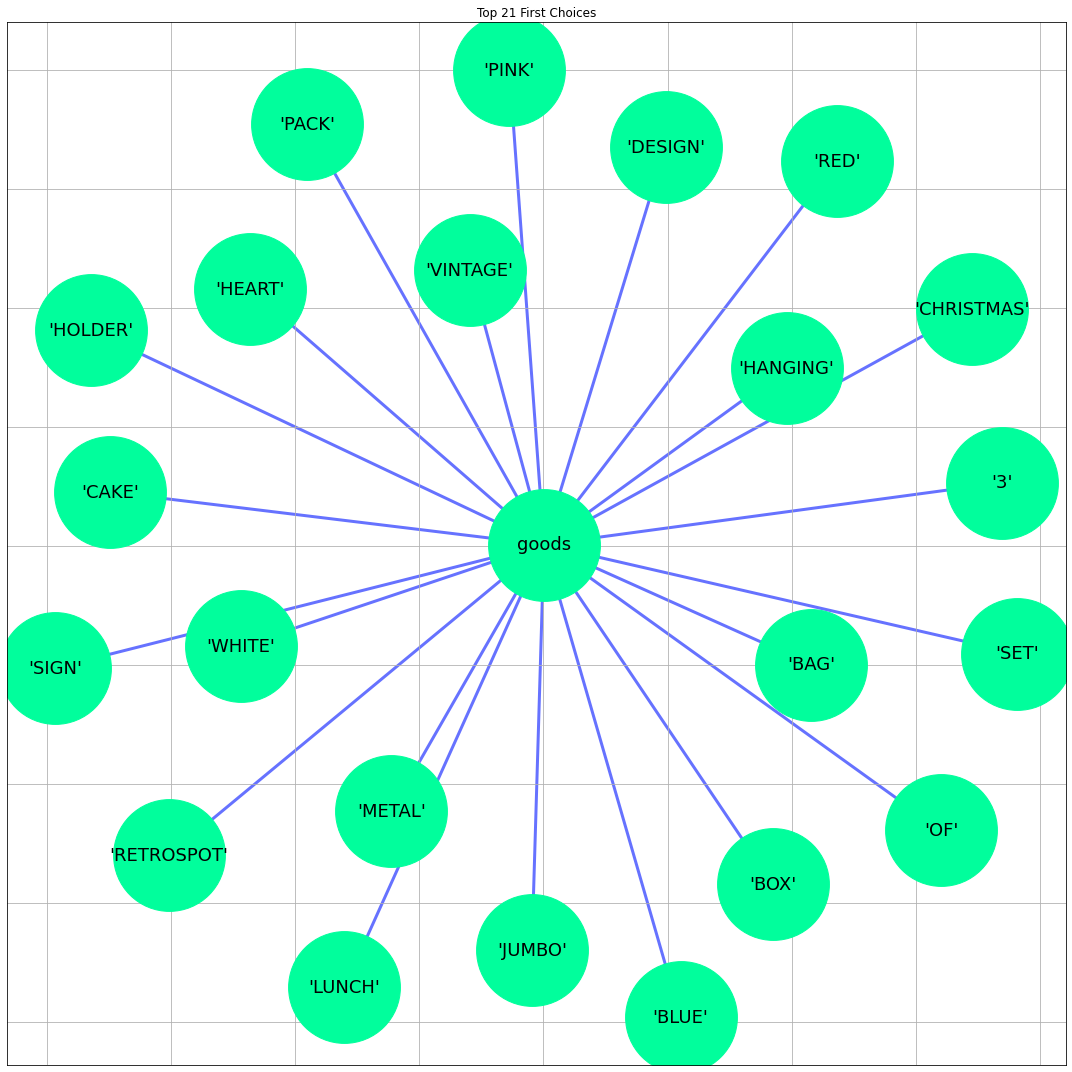

In [116]:
plt.rcParams['figure.figsize'] = (15, 15)
first_choice = nx.from_pandas_edgelist(df_table_first,
                                       source='goods',
                                       target='items',
                                       edge_attr=True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice,
                       pos,
                       node_size=12500,
                       node_color="#01fe9c")
nx.draw_networkx_edges(first_choice,
                       pos,
                       width=3,
                       alpha=0.6,
                       edge_color='#0015ff')
nx.draw_networkx_labels(first_choice,
                        pos,
                        font_size=18,
                        font_family='sans-serif')
plt.grid()
plt.title('Top 21 First Choices', fontsize=12)
plt.tight_layout()
plt.show()

In [117]:
# 1. Gather Only Second Choice of Each Transaction into Numpy Array

transaction3 = []
for i in range(0, df.shape[0]):
    transaction3.append(df.values[i, 1])

transaction3 = np.array(transaction3)

# 2. Transform Them a Pandas DataFrame
df_second = pd.DataFrame(transaction3, columns=["items"])
df_second["incident_count"] = 1

# 3. Delete NaN Items from Dataset
nan_items = df_second[df_second['items'] == "nan"].index
df_second.drop(nan_items, inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations
df_table_second = df_second.groupby("items").sum().sort_values(
    "incident_count", ascending=False).reset_index()
df_table_second["goods"] = "goods"
df_table_second = df_table_second.truncate(before=-1,
                                           after=10)  # 2nd 10 Choice

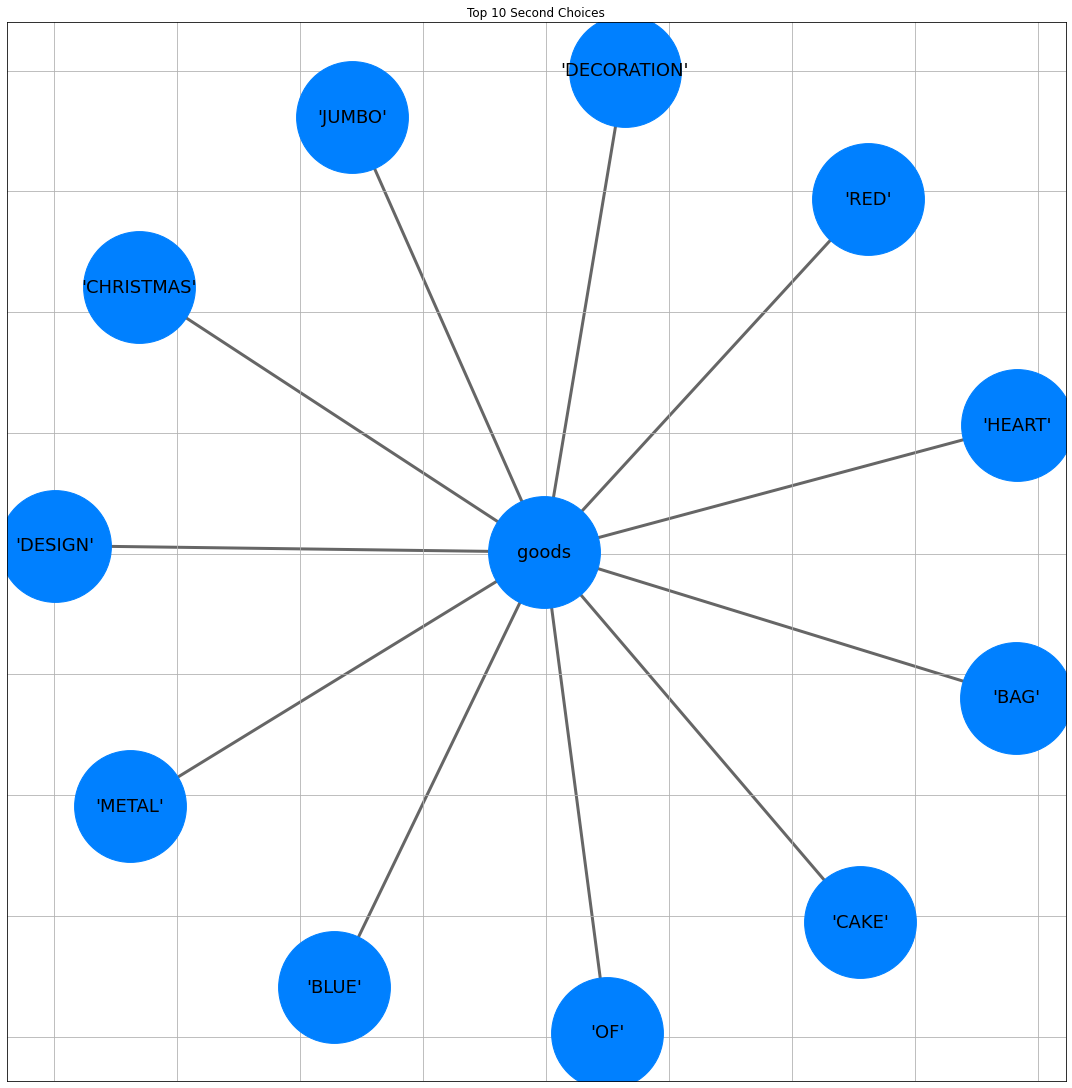

In [118]:
second_choice = nx.from_pandas_edgelist(df_table_second,
                                        source='goods',
                                        target="items",
                                        edge_attr=True)
pos = nx.spring_layout(second_choice)
nx.draw_networkx_nodes(second_choice,
                       pos,
                       node_size=12500,
                       node_color="#0080ff")
nx.draw_networkx_edges(second_choice,
                       pos,
                       width=3,
                       alpha=0.6,
                       edge_color='black')
nx.draw_networkx_labels(second_choice,
                        pos,
                        font_size=18,
                        font_family='sans-serif')
plt.rcParams['figure.figsize'] = (15, 15)
plt.tight_layout()
plt.grid()
plt.title('Top 10 Second Choices', fontsize=12)
plt.show()

 order to be able to use apriori algorithm and get most frequent itemsets, we have to transform our dataset into a 1 – 0 matrix where rows are transactions and columns are products. In that matrix, “1” should be encoded if the product has been bought on that transaction and “0” should be encoded if the product has not been bought on that transaction. 

In [119]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
transaction4 = []
for i in range(df.shape[0]):
    transaction4.append([str(df.values[i,j]) for j in range(df.shape[1])])
    

In [120]:
transaction4 = np.array(transaction4)

In [121]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()

In [122]:
tr_array = te.fit(transaction4).transform(transaction4)

In [123]:
te.columns_

["'!'",
 "'&'",
 "'''N'''",
 "'(22467)'",
 "'(22719)'",
 "'*Boombox'",
 "'*USB'",
 "'+'",
 "','",
 "',MAGIC'",
 "',PUDDINGS'",
 "'-'",
 "'-PAPER'",
 "'/'",
 "'0'",
 "'1'",
 "'1.8M'",
 "'10'",
 "'10/11/2010'",
 "'11'",
 "'12'",
 "'120CM'",
 "'125g'",
 "'15'",
 "'15C'",
 "'15CM'",
 "'16'",
 "'16954'",
 "'16955'",
 "'16956'",
 "'16957'",
 "'16960'",
 "'16961'",
 "'16963'",
 "'16965'",
 "'16X16CM'",
 "'17058'",
 "'17059'",
 "'17065'",
 "'17067'",
 "'17068'",
 "'17070'",
 "'17071'",
 "'17074'",
 "'17076'",
 "'17077'",
 "'17080'",
 "'17081'",
 "'17084'",
 "'17086'",
 "'17087'",
 "'17089'",
 "'17090'",
 "'17093'",
 "'17095'",
 "'17096'",
 "'17097'",
 "'17099'",
 "'17100'",
 "'17104'",
 "'17107'",
 "'17112'",
 "'17116'",
 "'17211'",
 "'17214'",
 "'17216'",
 "'17217'",
 "'17218'",
 "'17219'",
 "'17220'",
 "'17259'",
 "'17262'",
 "'1800'",
 "'18PC'",
 "'2'",
 "'20'",
 "'200'",
 "'20713'",
 "'20LIGHT'",
 "'21'",
 "'21/5/10'",
 "'22467'",
 "'22804'",
 "'23'",
 "'23343'",
 "'24'",
 "'250g'",
 "'25W

In [124]:
tr_array

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False,  True]])

In [125]:
dataset = pd.DataFrame(tr_array,columns=te.columns_)

In [126]:
dataset.shape

(557040, 2604)

We have 2604 columns/features at the moment. Extracting the most frequent itemsets from 121 feature would be compelling for a start
From that reason, we will start with Top 50 items which are already illustrated in Section-3

In [127]:
first25 = df_table["Items"].head(25).values # Select Top25
dataset = dataset.loc[:,first25] # Extract Top25
dataset

,'SET','OF','BAG','RED','HEART','RETROSPOT','VINTAGE','DESIGN','PINK','CHRISTMAS',...,'BLUE','3','LUNCH','HANGING','SIGN','HOLDER','PACK','T-LIGHT','SMALL','PAPER'
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557035,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
557036,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
557037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
557038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [128]:
dataset.columns

Index([''SET'', ''OF'', ''BAG'', ''RED'', ''HEART'', ''RETROSPOT'',
       ''VINTAGE'', ''DESIGN'', ''PINK'', ''CHRISTMAS'', ''BOX'', ''CAKE'',
       ''JUMBO'', ''METAL'', ''WHITE'', ''BLUE'', ''3'', ''LUNCH'',
       ''HANGING'', ''SIGN'', ''HOLDER'', ''PACK'', ''T-LIGHT'', ''SMALL'',
       ''PAPER''],
      dtype='object')

In [129]:
# Convert dataset into 1-0 encoding

def encode_units(x):
    if x == False:
        return 0 
    if x == True:
        return 1

In [130]:
dataset = dataset.applymap(encode_units)
dataset.head(10)

,'SET','OF','BAG','RED','HEART','RETROSPOT','VINTAGE','DESIGN','PINK','CHRISTMAS',...,'BLUE','3','LUNCH','HANGING','SIGN','HOLDER','PACK','T-LIGHT','SMALL','PAPER'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
frequent_itemsets = apriori(dataset, min_support=0.01, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.097713,('SET'),1
1,0.095776,('OF'),1
2,0.093191,('BAG'),1
3,0.077018,('RED'),1
4,0.069498,('HEART'),1
5,0.063058,('RETROSPOT'),1
6,0.060585,('VINTAGE'),1
7,0.053975,('DESIGN'),1
8,0.053005,('PINK'),1
9,0.045115,('CHRISTMAS'),1


In [132]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.02) ]

,support,itemsets,length
25,0.047189,"('OF', 'SET')",2
30,0.025377,"('OF', 'PACK')",2
35,0.034055,"('BAG', 'JUMBO')",2
36,0.024761,"('BAG', 'LUNCH')",2
37,0.036380,"('RETROSPOT', 'RED')",2
43,0.027169,"('METAL', 'SIGN')",2


In [133]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) ].head()

,support,itemsets,length
47,0.011933,"('OF', 'SET', '3')",3
48,0.012493,"('BAG', 'RETROSPOT', 'RED')",3
49,0.010416,"('BAG', 'LUNCH', 'DESIGN')",3
50,0.010439,"('HOLDER', 'HEART', 'T-LIGHT')",3
51,0.011480,"('HANGING', 'HOLDER', 'T-LIGHT')",3


In [134]:
# We can create our rules by defining metric and its threshold.

# For a start, 
#      We set our metric as "Lift" to define whether antecedents & consequents are dependent our not.
#      Treshold is selected as "1.2" since it is required to have lift scores above than 1 if there is dependency.

In [135]:
rules = association_rules(frequent_itemsets,metric='lift',min_threshold=1.2)

In [136]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,('OF'),('SET'),0.095776,0.097713,0.047189,0.492699,5.042315,0.037830,1.778604
1,('SET'),('OF'),0.097713,0.095776,0.047189,0.482932,5.042315,0.037830,1.748753
2,('SET'),('3'),0.097713,0.033561,0.016055,0.164303,4.895599,0.012775,1.156446
3,('3'),('SET'),0.033561,0.097713,0.016055,0.478363,4.895599,0.012775,1.729723
4,('OF'),('HEART'),0.095776,0.069498,0.010258,0.107102,1.541087,0.003602,1.042115
...,...,...,...,...,...,...,...,...,...
69,"('HANGING', 'T-LIGHT')",('HOLDER'),0.013572,0.029190,0.011480,0.845899,28.979080,0.011084,6.299849
70,"('HOLDER', 'T-LIGHT')",('HANGING'),0.019912,0.030583,0.011480,0.576542,18.851653,0.010871,2.289285
71,('HANGING'),"('HOLDER', 'T-LIGHT')",0.030583,0.019912,0.011480,0.375382,18.851653,0.010871,1.569098
72,('HOLDER'),"('HANGING', 'T-LIGHT')",0.029190,0.013572,0.011480,0.393296,28.979080,0.011084,1.625882


In [137]:
rules['antecedents_len'] = rules['antecedents'].apply(lambda x: len(x))
rules['consequents_len'] = rules['consequents'].apply(lambda x: len(x))

In [138]:
rules.sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
73,('T-LIGHT'),"('HANGING', 'HOLDER')",0.026135,0.011798,0.011480,0.439277,37.232968,0.011172,1.762372,1,2
68,"('HANGING', 'HOLDER')",('T-LIGHT'),0.011798,0.026135,0.011480,0.973068,37.232968,0.011172,36.159568,2,1
65,('HOLDER'),"('HEART', 'T-LIGHT')",0.029190,0.010439,0.010439,0.357626,34.258303,0.010134,1.540475,1,2
64,"('HEART', 'T-LIGHT')",('HOLDER'),0.010439,0.029190,0.010439,1.000000,34.258303,0.010134,inf,2,1
67,('T-LIGHT'),"('HOLDER', 'HEART')",0.026135,0.012295,0.010439,0.399437,32.486821,0.010118,1.644630,1,2
...,...,...,...,...,...,...,...,...,...,...,...
17,('VINTAGE'),('BAG'),0.060585,0.093191,0.013660,0.225465,2.419394,0.008014,1.170779,1,1
12,('BAG'),('RED'),0.093191,0.077018,0.014891,0.159793,2.074750,0.007714,1.098517,1,1
13,('RED'),('BAG'),0.077018,0.093191,0.014891,0.193348,2.074750,0.007714,1.124164,1,1
5,('HEART'),('OF'),0.069498,0.095776,0.010258,0.147599,1.541087,0.003602,1.060797,1,1


In [139]:
rules.sort_values("confidence",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
58,"('DESIGN', 'LUNCH')",('BAG'),0.010416,0.093191,0.010416,1.000000,10.730674,0.009445,inf,2,1
64,"('HEART', 'T-LIGHT')",('HOLDER'),0.010439,0.029190,0.010439,1.000000,34.258303,0.010134,inf,2,1
68,"('HANGING', 'HOLDER')",('T-LIGHT'),0.011798,0.026135,0.011480,0.973068,37.232968,0.011172,36.159568,2,1
11,('PACK'),('OF'),0.028072,0.095776,0.025377,0.904010,9.438803,0.022688,9.419955,1,1
21,('JUMBO'),('BAG'),0.037949,0.093191,0.034055,0.897393,9.629636,0.030519,8.837732,1,1
...,...,...,...,...,...,...,...,...,...,...,...
53,('BAG'),"('RETROSPOT', 'RED')",0.093191,0.036380,0.012493,0.134056,3.684913,0.009103,1.112798,1,2
47,('OF'),"('SET', '3')",0.095776,0.016055,0.011933,0.124590,7.760439,0.010395,1.123982,1,2
48,('SET'),"('OF', '3')",0.097713,0.014636,0.011933,0.122120,8.343654,0.010503,1.122436,1,2
59,('BAG'),"('DESIGN', 'LUNCH')",0.093191,0.010416,0.010416,0.111768,10.730674,0.009445,1.114106,1,2


Since the most demanded product is SET in the dataset, the association results are mainly dominated by it. From that reason, to get more insights, it’s better to create a confidence table excluding the SET

In [147]:
rules[~rules['consequents'].str.contains('SET', regex=False) &
      ~rules['antecedents'].str.contains('SET', regex=False)].sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
58,"('DESIGN', 'LUNCH')",('BAG'),0.010416,0.093191,0.010416,1.000000,10.730674,0.009445,inf,2,1
64,"('HEART', 'T-LIGHT')",('HOLDER'),0.010439,0.029190,0.010439,1.000000,34.258303,0.010134,inf,2,1
68,"('HANGING', 'HOLDER')",('T-LIGHT'),0.011798,0.026135,0.011480,0.973068,37.232968,0.011172,36.159568,2,1
11,('PACK'),('OF'),0.028072,0.095776,0.025377,0.904010,9.438803,0.022688,9.419955,1,1
21,('JUMBO'),('BAG'),0.037949,0.093191,0.034055,0.897393,9.629636,0.030519,8.837732,1,1
...,...,...,...,...,...,...,...,...,...,...,...
53,('BAG'),"('RETROSPOT', 'RED')",0.093191,0.036380,0.012493,0.134056,3.684913,0.009103,1.112798,1,2
47,('OF'),"('SET', '3')",0.095776,0.016055,0.011933,0.124590,7.760439,0.010395,1.123982,1,2
48,('SET'),"('OF', '3')",0.097713,0.014636,0.011933,0.122120,8.343654,0.010503,1.122436,1,2
59,('BAG'),"('DESIGN', 'LUNCH')",0.093191,0.010416,0.010416,0.111768,10.730674,0.009445,1.114106,1,2


In [149]:
confidence = rules[~rules['consequents'].str.contains('OF', regex=False) &
      ~rules['antecedents'].str.contains('OF', regex=False)].sort_values('confidence',ascending=False)

In [151]:
confidence[confidence['confidence']>=0.7]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len,consequents_len
58,"('DESIGN', 'LUNCH')",('BAG'),0.010416,0.093191,0.010416,1.000000,10.730674,0.009445,inf,2,1
64,"('HEART', 'T-LIGHT')",('HOLDER'),0.010439,0.029190,0.010439,1.000000,34.258303,0.010134,inf,2,1
68,"('HANGING', 'HOLDER')",('T-LIGHT'),0.011798,0.026135,0.011480,0.973068,37.232968,0.011172,36.159568,2,1
11,('PACK'),('OF'),0.028072,0.095776,0.025377,0.904010,9.438803,0.022688,9.419955,1,1
21,('JUMBO'),('BAG'),0.037949,0.093191,0.034055,0.897393,9.629636,0.030519,8.837732,1,1
37,('SIGN'),('METAL'),0.030515,0.037416,0.027169,0.890340,23.795942,0.026027,8.777902,1,1
62,"('HOLDER', 'HEART')",('T-LIGHT'),0.012295,0.026135,0.010439,0.849029,32.486821,0.010118,6.450681,2,1
69,"('HANGING', 'T-LIGHT')",('HOLDER'),0.013572,0.029190,0.011480,0.845899,28.979080,0.011084,6.299849,2,1
51,"('BAG', 'RED')",('RETROSPOT'),0.014891,0.063058,0.012493,0.838939,13.304181,0.011554,5.817314,2,1
50,"('BAG', 'RETROSPOT')",('RED'),0.014961,0.077018,0.012493,0.835013,10.841820,0.011341,5.594279,2,1


There are many associations with high confidence and lift score. We are on the right way!